# An NLP workshop - Categorizing tweets into relevant or non-relevant
#### adapted from https://github.com/hundredblocks/concrete_NLP_tutorial.git

## 1. EDA - Exploratory Data Analysis

In this notebook, we will load and explore the dataset to get a better feel for it.

### Our Dataset: Disasters on social media
Contributors looked at over 10,000 tweets retrieved with a variety of searches like “ablaze”, “quarantine”, and “pandemonium”, then noted whether the tweet referred to a disaster event (as opposed to a joke with the word or a movie review or something non-disastrous). Thank you [Crowdflower](https://www.crowdflower.com/data-for-everyone/).

First lets import all the libraries we will need upfront

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

The following line ensures graphs get rendered properly

In [2]:
%matplotlib inline

### Let's inspect the data

In [3]:
questions = pd.read_csv("socialmedia_relevant_cols.csv", encoding='ISO-8859-1')
questions.columns=['text', 'choose_one', 'class_label']
questions.head()

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1


In [4]:
questions.tail()

,text,choose_one,class_label
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1
10875,#CityofCalgary has activated its Municipal Eme...,Relevant,1


In [5]:
questions.describe()

,class_label
count,10876.000000
mean,0.432604
std,0.498420
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [6]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 3 columns):
text           10876 non-null object
choose_one     10876 non-null object
class_label    10876 non-null int64
dtypes: int64(1), object(2)
memory usage: 255.0+ KB


### Data Overview
Let's look at our class balance.

In [7]:
questions.groupby("choose_one").count()

,text,class_label
choose_one,,
Can't Decide,16,16
Not Relevant,6187,6187
Relevant,4673,4673


We can see our classes are pretty balanced, with a slight oversampling of the "Irrelevant" class. There's a few samples that the labellers weren't sure about - maybe we should drop those?

Let's see what the length of each tweet is

In [8]:
questions['tweet_len'] = questions.text.apply(len)

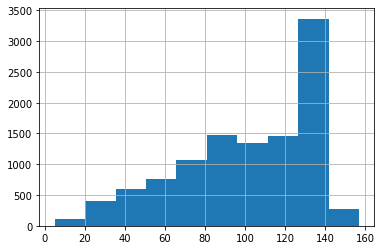

In [9]:
questions.tweet_len.hist()

So quite a lot of 140 character tweets - not unexpected!

### Tokenizing

Usually in NLP we work with words not characters, so let's get a sense of the words by breaking down each tweet into a list of tokens.

In [11]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

questions["tokens"] = questions["text"].apply(tokenizer.tokenize)
questions.head()

,text,choose_one,class_label,tweet_len,tokens
0,Just happened a terrible car crash,Relevant,1,34,"[Just, happened, a, terrible, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,69,"[Our, Deeds, are, the, Reason, of, this, earth..."
2,"Heard about #earthquake is different cities, s...",Relevant,1,64,"[Heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,96,"[there, is, a, forest, fire, at, spot, pond, g..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,38,"[Forest, fire, near, La, Ronge, Sask, Canada]"


Let's see how many words our tweets contain

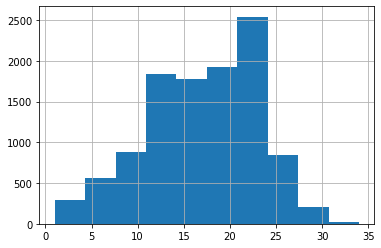

In [12]:
questions['token_len'] = questions.tokens.apply(len)
questions.token_len.hist()

How many unique words do we have? This is our *vocabulary*

In [13]:
all_words = {word for tokens in questions.tokens for word in tokens}
print(f"Total number of unique tokens {len(all_words)}")

Total number of unique tokens 33267


Let's take a closer look at some of the tokens ...

In [14]:
from pprint import pprint
pprint(all_words)

{'0',
 '00',
 '000',
 '0000',
 '000siJjL3t',
 '007Npen6LG',
 '00End',
 '00PM',
 '00am',
 '00cY9vXEFF',
 '00pm',
 '01',
 '01HuX8Y9Gi',
 '02',
 '0215',
 '02ELqLOpFk',
 '02PM',
 '03',
 '030',
 '032',
 '033',
 '034',
 '039',
 '03L7NwQDje',
 '03bJm4ORoW',
 '04',
 '05',
 '0518',
 '05qooc9CbR',
 '05th',
 '06',
 '060',
 '061',
 '06JST',
 '07',
 '073izwX0lB',
 '07nKMO7VaS',
 '08',
 '0840728',
 '0853',
 '087809233445',
 '0880',
 '08LnGClZsj',
 '09',
 '0992',
 '0AIV5KhZjv',
 '0BVK5tuB4J',
 '0BkmuhYSFx',
 '0BtnIwAgt1',
 '0Bznfdg0aR',
 '0C1y8g7E9p',
 '0CXm5TkZ8y',
 '0DrqlrsGY5',
 '0DxVZ7fDh3',
 '0Erisq25KT',
 '0FDsc3f2IW',
 '0FS9kSV5xK',
 '0GHk693EgJ',
 '0Gidg9U45J',
 '0IPaVKJgDC',
 '0IYuntXDUv',
 '0KJjdaOJHI',
 '0KTxo7HLne',
 '0Keh2TReNy',
 '0KrW1zYaHM',
 '0L',
 '0LLwuqn8vg',
 '0La1aw9uUd',
 '0Lw6GyeAgB',
 '0MNPCER9nO',
 '0McXc68GZD',
 '0NR4DPjgyL',
 '0NVdzxQ2HF',
 '0OjKuLqO5I',
 '0PAMznyYuw',
 '0Q040STkCV',
 '0RokDuTyUN',
 '0RtxTT11jj',
 '0ScNWe8XbV',
 '0SmhjXWcbo',
 '0T8VqKEArI',
 '0T9yd557rY',


#### Some observations:

- There's a mixture of all lower-case words and words starting with an upper-case letter. Does case matter for our purposes? Should we just convert everything to lower-case?
- There's a lot of words that are random strings of letters. Where are they coming from? URLs?
- There's a lot of numbers. Do they matter for our purposes? What should we do with them?
- The RegexpTokenizer seems to have removed almost punctuation. Is that a good thing?

Let's look again at a random sample of some full tweets

In [15]:
pd.set_option('display.max_colwidth', 100)

In [17]:
questions.text.sample(10)

7918     'Three #people were #killed when a severe #rainstorm in the #Italian #Alps caused a #landslide' ...
9868     @PyramidHead76 one good thing came out of watching the film.  Was too traumatised to watch show ...
7879     http://t.co/AyLATPE073 Reddit's new content policy goes into effect many horrible subreddits ban...
10754                                           Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM
10170    RT @calgarysun: Sun photographer Stuart Dryden spotted this vortex spun off a violent storm in S...
9180     IS claims suicide bombing against Saudi police: An Islamic State group suicide bomber on Thursda...
3577     And the 10 horns which u saw on the beast these will hate the harlet make her desolate and naked...
9976     An optical illusion - clouds rolling in over the mountains looks like a Tsunami - Geneva - Switz...
6299            quoted here--&gt;CNN: Purported ISIS video threatens Croatian hostage http://t.co/swVuZxi6gT
5957               

What you see will vary depending on what tweets you get. You can run the above cell multiple times to see different samples.

#### Further observations

- What to do with @ mentions?
- URLs are typically shortened to `http://t.co/<some random chars>`